### Early mandates and reporting
- Review of 4 mandates that were implemented in the 8 countries selected for this data analysis. 
- Identify the date that each mandate was implemented

In [1]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Read CSV file 
data = pd.read_csv("oxford_clean.csv")

In [2]:
# Create DataFrame 
mandates = pd.DataFrame(data, columns = ["CountryName", "Date", "C1_School_closing", "C2_Workplace_closing", \
                                         "C6_Stay_home_requirements", "H6_Facial_coverings", "ConfirmedCases", "ConfirmedDeaths"])

# Rename columns
mandates.columns = ["Country_name", "Date", "School_closing", "Workplace_closing", "Stay_home", "Facial_coverings", "Confirmed_cases", "Confirmed_deaths"]

# Change the value of columns from float to integer
mandates = mandates.astype({'School_closing': 'int', 'Workplace_closing': 'int', 'Stay_home': 'int', \
                            'Facial_coverings': 'int', 'Confirmed_cases': 'int', 'Confirmed_deaths': 'int'}) 

# Format 'Date' from YYYYMMDD to DD/MM/YYYY
mandates['Date'] = pd.to_datetime(mandates['Date'], format='%Y%m%d')

mandates.dropna()

,Country_name,Date,School_closing,Workplace_closing,Stay_home,Facial_coverings,Confirmed_cases,Confirmed_deaths
0,Brazil,2020-01-01,0,0,0,0,0,0
1,Brazil,2020-01-02,0,0,0,0,0,0
2,Brazil,2020-01-03,0,0,0,0,0,0
3,Brazil,2020-01-04,0,0,0,0,0,0
4,Brazil,2020-01-05,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
2405,United States,2020-10-21,3,2,2,4,8273304,221066
2406,United States,2020-10-22,3,2,2,4,8336282,222201
2407,United States,2020-10-23,3,2,2,4,8408340,223042
2408,United States,2020-10-24,3,2,2,4,8493669,223995


### Leyend for Table Above

###### School Closing Code
- 0: No measures 
- 1: Recommend closing
- 2: Require closing (only some levels)
- 3: Require closing ALL levels 
---
###### Workplace Closing Code
- 0: No measures 
- 1: Recommend closing
- 2: Require closing (only some levels)
- 3: Require closing ALL levels 
---
###### Stay at Home Requirements
- 0: No measures 
- 1: Recommend closing
- 2: Require closing (only some levels)
- 3: Require closing ALL levels 
---
###### Facial Coverings
- 0: No measures 
- 1: Recommend 
- 2: Required in some specified shared/public spaces outside the home with other people present, or some situations when social distancing not possible
- 3: Required in all shared/public spaces outside the home with other people present or all situations when social distancing not possible
- 4: Required outside the home at all times regardless of location or presence of other people
-------

### Confirmed Cases and Deaths 

###### Date Confirmed First Cases Reported 
- Note: CSV file collects data as of 01/01/2020. China was reporting cases of COVID-19 in December 2019. 

In [3]:
#Drop the rows Confirmed Cases is 0 
cases = mandates[mandates['Confirmed_cases'] > 0]

# For Loop 
reported_case = [] 

for country in cases['Country_name'].unique():
    country_df = cases[cases['Country_name'] == country]
    reported_case.append(country_df[country_df['Date'] == country_df['Date'].min()])
    
pd.concat(reported_case)

,Country_name,Date,School_closing,Workplace_closing,Stay_home,Facial_coverings,Confirmed_cases,Confirmed_deaths
56,Brazil,2020-02-26,0,0,0,0,1,0
302,China,2020-01-01,0,0,0,1,27,0
636,United Kingdom,2020-02-01,0,0,0,0,2,0
941,Italy,2020-01-31,0,0,0,0,3,0
1221,Japan,2020-01-15,0,0,0,0,1,0
1572,New Zealand,2020-02-28,0,0,0,0,1,0
1842,Sweden,2020-02-01,0,0,0,0,1,0
2132,United States,2020-01-21,0,0,0,0,1,0


###### Date Confirmed Deaths First Reported
- Note: CSV file collects data as of 01/01/2020. China was reporting cases of COVID-19 in December 2019. 

In [4]:
#Drop the rows ConfirmedDeaths is 0 
deaths = mandates[mandates['Confirmed_deaths'] > 0]

# For Loop 
reported_death = [] 

for country in deaths['Country_name'].unique():
    country_df = deaths[deaths['Country_name'] == country]
    reported_death.append(country_df[country_df['Date'] == country_df['Date'].min()])
  
pd.concat(reported_death) 

,Country_name,Date,School_closing,Workplace_closing,Stay_home,Facial_coverings,Confirmed_cases,Confirmed_deaths
77,Brazil,2020-03-18,3,3,1,1,291,1
312,China,2020-01-11,0,0,0,1,59,1
671,United Kingdom,2020-03-07,0,0,0,0,271,1
964,Italy,2020-02-23,3,3,2,0,79,2
1250,Japan,2020-02-13,0,0,0,0,29,1
1593,New Zealand,2020-03-29,3,3,2,0,476,1
1882,Sweden,2020-03-12,0,0,0,0,620,10
2172,United States,2020-03-01,0,0,0,0,69,1


### Dates of Mandates Implementation

###### Date School Closing Mandates Implemented 
- 0: No measures 
- 1: Recommend closing
- 2: Require closing (only some levels)
- 3: Require closing ALL levels 

In [5]:
#Drop the rows School Closing is 0 
schools = mandates[mandates['School_closing'] > 0]

# For Loop 
school_closed = [] 

for country in schools['Country_name'].unique():
    country_df = schools[schools['Country_name'] == country]
    school_closed.append(country_df[country_df['Date'] == country_df['Date'].min()])
  
pd.concat(school_closed) 

,Country_name,Date,School_closing,Workplace_closing,Stay_home,Facial_coverings,Confirmed_cases,Confirmed_deaths
71,Brazil,2020-03-12,3,0,0,1,52,0
327,China,2020-01-26,3,3,1,3,1988,56
682,United Kingdom,2020-03-18,3,1,1,0,3658,82
964,Italy,2020-02-23,3,3,2,0,79,2
1268,Japan,2020-03-02,3,1,0,1,254,6
1585,New Zealand,2020-03-21,1,1,1,0,53,0
1888,Sweden,2020-03-18,1,0,0,0,1265,17
2176,United States,2020-03-05,3,0,0,0,159,11


###### Date Workplace Closing Mandates Implemented 
- 0: No measures 
- 1: Recommend closing
- 2: Require closing (only some levels)
- 3: Require closing ALL levels 

In [6]:
#Drop the rows Workplace Closing is 0 
work = mandates[mandates['Workplace_closing'] > 0]

# For Loop 
work_closed = [] 

for country in work['Country_name'].unique():
    country_df = work[work['Country_name'] == country]
    work_closed.append(country_df[country_df['Date'] == country_df['Date'].min()])
  
pd.concat(work_closed) 

,Country_name,Date,School_closing,Workplace_closing,Stay_home,Facial_coverings,Confirmed_cases,Confirmed_deaths
72,Brazil,2020-03-13,3,1,1,1,77,0
327,China,2020-01-26,3,3,1,3,1988,56
680,United Kingdom,2020-03-16,0,1,1,0,2605,43
963,Italy,2020-02-22,0,3,0,0,17,0
1262,Japan,2020-02-25,0,1,0,0,144,1
1585,New Zealand,2020-03-21,1,1,1,0,53,0
1895,Sweden,2020-03-25,1,1,0,0,2399,90
2190,United States,2020-03-19,3,3,2,0,9415,150


###### Date Stay at Home Mandates Implemented 
- 0: No measures 
- 1: Recommend closing
- 2: Require closing (only some levels)
- 3: Require closing ALL levels 

In [7]:
#Drop the rows Stay at home requirements is 0 
lockdown = mandates[mandates['Stay_home'] > 0]

# For Loop 
stay_home = [] 

for country in lockdown['Country_name'].unique():
    country_df = lockdown[lockdown['Country_name'] == country]
    stay_home.append(country_df[country_df['Date'] == country_df['Date'].min()])
  
pd.concat(stay_home) 

,Country_name,Date,School_closing,Workplace_closing,Stay_home,Facial_coverings,Confirmed_cases,Confirmed_deaths
72,Brazil,2020-03-13,3,1,1,1,77,0
324,China,2020-01-23,0,0,1,3,623,17
677,United Kingdom,2020-03-13,0,0,1,0,1282,9
964,Italy,2020-02-23,3,3,2,0,79,2
1304,Japan,2020-04-07,3,1,1,1,3906,80
1585,New Zealand,2020-03-21,1,1,1,0,53,0
2186,United States,2020-03-15,3,0,2,0,2951,57


###### Date Facial Coverings Mandates Implemented 
- 0: No measures 
- 1: Recommend 
- 2: Required in some specified shared/public spaces outside the home with other people present, or some situations when social distancing not possible
- 3: Required in all shared/public spaces outside the home with other people present or all situations when social distancing not possible
- 4: Required outside the home at all times regardless of location or presence of other people

In [8]:
#Drop the rows Facial Coverings is 0 
facial_covering = mandates[mandates['Facial_coverings'] > 0]

# For Loop 
mask = [] 

for country in facial_covering['Country_name'].unique():
    country_df = facial_covering[facial_covering['Country_name'] == country]
    mask.append(country_df[country_df['Date'] == country_df['Date'].min()])
  
pd.concat(mask)

,Country_name,Date,School_closing,Workplace_closing,Stay_home,Facial_coverings,Confirmed_cases,Confirmed_deaths
61,Brazil,2020-03-02,0,0,0,1,2,0
302,China,2020-01-01,0,0,0,1,27,0
862,United Kingdom,2020-09-14,1,2,1,3,368504,41628
1005,Italy,2020-04-04,3,3,3,4,119827,14681
1267,Japan,2020-03-01,0,1,0,1,239,5
1729,New Zealand,2020-08-12,2,3,2,1,1220,22
2217,United States,2020-04-15,3,3,2,3,609516,26057


In [9]:
combined_df = school_closed + work_closed + stay_home + mask + reported_case + reported_death
df = pd.concat(combined_df)
df = df.sort_index()
df.drop_duplicates()

,Country_name,Date,School_closing,Workplace_closing,Stay_home,Facial_coverings,Confirmed_cases,Confirmed_deaths
56,Brazil,2020-02-26,0,0,0,0,1,0
61,Brazil,2020-03-02,0,0,0,1,2,0
71,Brazil,2020-03-12,3,0,0,1,52,0
72,Brazil,2020-03-13,3,1,1,1,77,0
77,Brazil,2020-03-18,3,3,1,1,291,1
302,China,2020-01-01,0,0,0,1,27,0
312,China,2020-01-11,0,0,0,1,59,1
324,China,2020-01-23,0,0,1,3,623,17
327,China,2020-01-26,3,3,1,3,1988,56
636,United Kingdom,2020-02-01,0,0,0,0,2,0


### Level of Each Mandate

In [10]:
## Verify the mandate level of each mandate and create a new columns
# Create new columns for the mandate level
mandates['School_Mandates'] = ''
mandates['Work_Mandates'] = ''
mandates['Stay_Home_Mandates'] = ''
mandates['Mask_Mandate'] = ''

# Set multiple conditions and assign reviewer category with .loc

# School_Mandates
mandates.loc[(mandates['School_closing'] == 0), 'School_Mandates'] = 'No measures'
mandates.loc[(mandates['School_closing'] == 1), 'School_Mandates'] = 'Recommend'
mandates.loc[(mandates['School_closing'] == 2), 'School_Mandates'] = 'Require closing (only some levels)'
mandates.loc[(mandates['School_closing'] == 3), 'School_Mandates'] = 'Require closing ALL levels'

# Work_Mandates
mandates.loc[(mandates['Workplace_closing'] == 0), 'Work_Mandates'] = 'No measures'
mandates.loc[(mandates['Workplace_closing'] == 1), 'Work_Mandates'] = 'Recommend'
mandates.loc[(mandates['Workplace_closing'] == 2), 'Work_Mandates'] = 'Require closing (only some levels)'
mandates.loc[(mandates['Workplace_closing'] == 3), 'Work_Mandates'] = 'Require closing ALL levels'

# Stay_Home_Mandates
mandates.loc[(mandates['Stay_home'] == 0), 'Stay_Home_Mandates'] = 'No measures'
mandates.loc[(mandates['Stay_home'] == 1), 'Stay_Home_Mandates'] = 'Recommend'
mandates.loc[(mandates['Stay_home'] == 2), 'Stay_Home_Mandates'] = 'Require closing (only some levels)'
mandates.loc[(mandates['Stay_home'] == 3), 'Stay_Home_Mandates'] = 'Require closing ALL levels'

# Mask Mandates
mandates.loc[(mandates['Facial_coverings'] == 0), 'Mask_Mandate'] = 'No measures'
mandates.loc[(mandates['Facial_coverings'] == 1), 'Mask_Mandate'] = 'Recommend'
mandates.loc[(mandates['Facial_coverings'] == 2), 'Mask_Mandate'] = 'Required in some specified areas'
mandates.loc[(mandates['Facial_coverings'] == 3), 'Mask_Mandate'] = 'Required all public areas'
mandates.loc[(mandates['Facial_coverings'] == 4), 'Mask_Mandate'] = 'Required all the time'

# Show DataFrame
mandates.head()

,Country_name,Date,School_closing,Workplace_closing,Stay_home,Facial_coverings,Confirmed_cases,Confirmed_deaths,School_Mandates,Work_Mandates,Stay_Home_Mandates,Mask_Mandate
0,Brazil,2020-01-01,0,0,0,0,0,0,No measures,No measures,No measures,No measures
1,Brazil,2020-01-02,0,0,0,0,0,0,No measures,No measures,No measures,No measures
2,Brazil,2020-01-03,0,0,0,0,0,0,No measures,No measures,No measures,No measures
3,Brazil,2020-01-04,0,0,0,0,0,0,No measures,No measures,No measures,No measures
4,Brazil,2020-01-05,0,0,0,0,0,0,No measures,No measures,No measures,No measures


#### DataFrame Displaying Level of Mandates 

In [11]:
# Create a new DataFrame with Country, Dates, Level of Mandates, Confirmed Cases & Deaths 
level_df = pd.DataFrame(mandates, columns = ["Country_name", "Date", "School_Mandates", "Work_Mandates", \
                                             "Stay_Home_Mandates", "Mask_Mandate", "Confirmed_cases", "Confirmed_deaths"])
level_df

,Country_name,Date,School_Mandates,Work_Mandates,Stay_Home_Mandates,Mask_Mandate,Confirmed_cases,Confirmed_deaths
0,Brazil,2020-01-01,No measures,No measures,No measures,No measures,0,0
1,Brazil,2020-01-02,No measures,No measures,No measures,No measures,0,0
2,Brazil,2020-01-03,No measures,No measures,No measures,No measures,0,0
3,Brazil,2020-01-04,No measures,No measures,No measures,No measures,0,0
4,Brazil,2020-01-05,No measures,No measures,No measures,No measures,0,0
...,...,...,...,...,...,...,...,...
2405,United States,2020-10-21,Require closing ALL levels,Require closing (only some levels),Require closing (only some levels),Required all the time,8273304,221066
2406,United States,2020-10-22,Require closing ALL levels,Require closing (only some levels),Require closing (only some levels),Required all the time,8336282,222201
2407,United States,2020-10-23,Require closing ALL levels,Require closing (only some levels),Require closing (only some levels),Required all the time,8408340,223042
2408,United States,2020-10-24,Require closing ALL levels,Require closing (only some levels),Require closing (only some levels),Required all the time,8493669,223995


#### Correlation Between Country + Mask_Mandate and Confirmed Cases

In [12]:
# Contingency Table showing correlation between Country_name + Mask_Mandate and Confirmed_cases.

data_crosstabs = pd.crosstab([df.Country_name, df.Date],  
                             mandates.Mask_Mandate, margins = False) 
data_crosstabs

Mask_Mandate               No measures  Recommend  Required all public areas  \
Country_name   Date                                                            
Brazil         2020-02-26            1          0                          0   
               2020-03-02            0          1                          0   
               2020-03-12            0          1                          0   
               2020-03-13            0          2                          0   
               2020-03-18            0          1                          0   
China          2020-01-01            0          2                          0   
               2020-01-11            0          1                          0   
               2020-01-23            0          0                          1   
               2020-01-26            0          0                          2   
Italy          2020-01-31            1          0                          0   
               2020-02-22            1          0                          0   
               2020-02-23            3          0                          0   
               2020-04-04            0          0                          0   
Japan          2020-01-15            1          0                          0   
               2020-02-13            1          0                          0   
               2020-02-25            1          0                          0   
               2020-03-01            0          1                          0   
               2020-03-02            0          1                          0   
               2020-04-07            0          1                          0   
New Zealand    2020-02-28            1          0                          0   
               2020-03-21            3          0                          0   
               2020-03-29            1          0                          0   
               2020-08-12            0          1                          0   
Sweden         2020-02-01            1          0                          0   
               2020-03-12            1          0                          0   
               2020-03-18            1          0                          0   
               2020-03-25            1          0                          0   
United Kingdom 2020-02-01            1          0                          0   
               2020-03-07            1          0                          0   
               2020-03-13            1          0                          0   
               2020-03-16            1          0                          0   
               2020-03-18            1          0                          0   
               2020-09-14            0          0                          1   
United States  2020-01-21            1          0                          0   
               2020-03-01            1          0                          0   
               2020-03-05            1          0                          0   
               2020-03-15            1          0                          0   
               2020-03-19            1          0                          0   
               2020-04-15            0          0                          1   

Mask_Mandate               Required all the time  
Country_name   Date                               
Brazil         2020-02-26                      0  
               2020-03-02                      0  
               2020-03-12                      0  
               2020-03-13                      0  
               2020-03-18                      0  
China          2020-01-01                      0  
               2020-01-11                      0  
               2020-01-23                      0  
               2020-01-26                      0  
Italy          2020-01-31                      0  
               2020-02-22                      0  
               2020-02-23                      0  
     

In [13]:
mandates.dtypes

Country_name                  object
Date                  datetime64[ns]
School_closing                 int32
Workplace_closing              int32
Stay_home                      int32
Facial_coverings               int32
Confirmed_cases                int32
Confirmed_deaths               int32
School_Mandates               object
Work_Mandates                 object
Stay_Home_Mandates            object
Mask_Mandate                  object
dtype: object

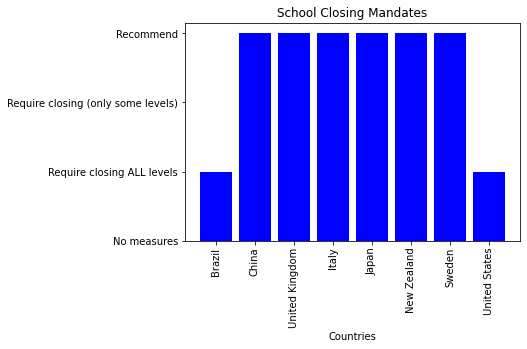

In [25]:
# Create bar plot displaying level of mandate for School Closing Mandates for 8 countries of
# interest for all dates reporting (Jan-Oct, 2020) in mandates CSV file
plt.bar(level_df['Country_name'],level_df['School_Mandates'], color = 'b')
plt.xticks(rotation='vertical')
plt.title('School Closing Mandates')
plt.xlabel('Countries')
plt.savefig('output_mandates/School_Closing_Mandates.png')
plt.show()

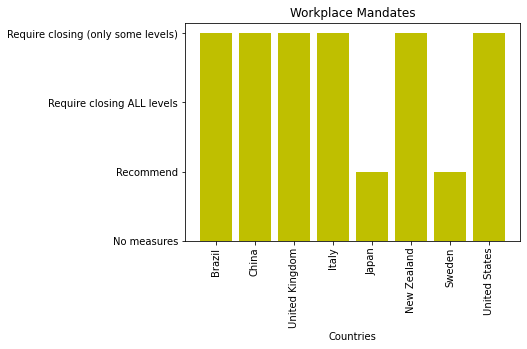

In [15]:
# Create bar plot displaying level of mandate for Workplace Closing Mandates for 8 countries of
# interest for all dates reporting (Jan-Oct, 2020) in mandates CSV file
plt.bar(level_df['Country_name'],level_df['Work_Mandates'], color = 'y')
plt.xticks(rotation='vertical')
plt.title('Workplace Mandates')
plt.xlabel('Countries')
plt.savefig('output_mandates/Workplace_Mandates.png')
plt.show()

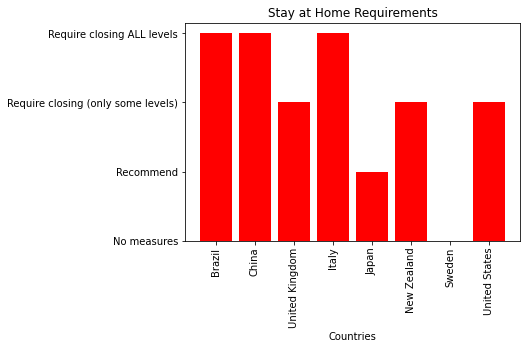

In [16]:
# Create bar plot displaying level of mandate for Stay at Home Requirements for 8 countries of
# interest for all dates reporting (Jan-Oct, 2020) in mandates CSV file
plt.bar(level_df['Country_name'],level_df['Stay_Home_Mandates'], color = 'r')
plt.xticks(rotation='vertical')
plt.title('Stay at Home Requirements')
plt.xlabel('Countries')
plt.savefig('output_mandates/Stay_Home_Mandates.png')
plt.show()

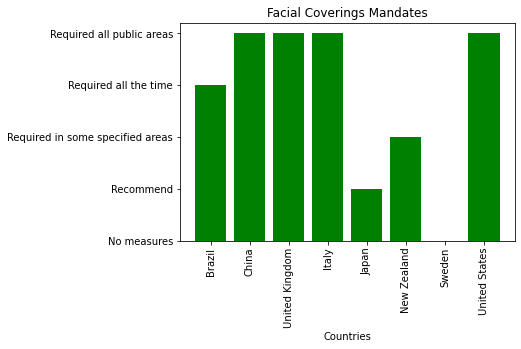

In [17]:
# Create bar plot displaying level of mandate for Facial Coverings for 8 countries of
# interest for all dates reporting (Jan-Oct, 2020) in mandates CSV file
plt.bar(level_df['Country_name'],level_df['Mask_Mandate'], color = 'g')
plt.xticks(rotation='vertical')
plt.title('Facial Coverings Mandates')
plt.xlabel('Countries')
plt.savefig('output_mandates/Facial_Coverings_Mandates.png')
plt.show()

In [18]:
### IDEAS

# Line plot y - confirmed cases, x - dates, color of lines measures in place (use 0-3 scale for lines)
# Country? 

### Pick USA is work_closing more highly correlated with deaths or stay_home ---- lower deaths

# Pivot 'School_closing', 'Workplace_closing', 'Stay_home', 'Facial_coverings'
